In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [2]:
x, y = load_data("data/ex2data1.txt")
m, n = x.shape

## Logistic Regression

Visualising data

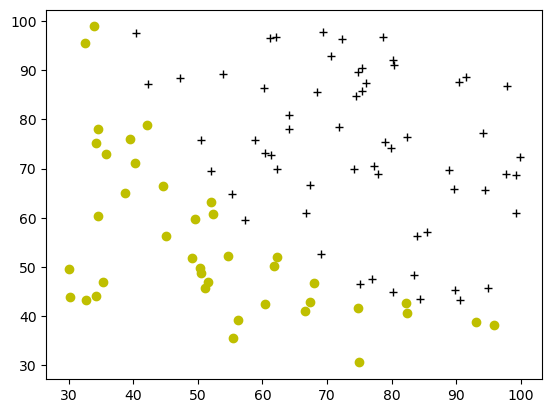

In [3]:
plot_data(x, y)

Functions

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [5]:
def f(x, w, b):
    return sigmoid(np.dot(x, w) + b)

In [6]:
def compute_cost(x, y, w, b, lambda_=0):
    m = x.shape[0]
    return -((1/(m)) * np.sum(np.dot(y, np.log(f(x, w, b))) + np.dot((1 - y), np.log(1 - f(x, w, b)))))

In [7]:
def compute_gradient(x, y, w, b, lambda_=0):
    m = x.shape[0]
    dj_dw = (1/m) * np.dot(f(x, w, b) - y, x)
    dj_db = (1/m) * np.sum(f(x, w, b) - y)
    return dj_db, dj_dw

In [8]:
def gradient_descent(x, y, w, b, cost_fn, gradient_fn, alpha, iter, lambda_=0):
    for i in range(iter):
        dj_db, dj_dw = gradient_fn(x, y, w, b, lambda_)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = cost_fn(x, y, w, b, lambda_)
        if (i % 1000 == 0 or i == iter - 1) and i != 0:
            print("Iterations: {} Cost: {:.2}".format(i, cost))
    
    return cost, w, b


In [9]:
def predict(x, w, b):
    p = np.where(
        f(x, w, b) > 0.5, 1, 0
    )
    return p

In [10]:
def accuracy(x, y, w, b):
    p = predict(x, w,b)
    return 'Train Accuracy: %f'%(np.mean(p == y) * 100)

Tests

In [11]:
# UNIT TESTS    
from public_tests import *
print("Tests for sigmoid calculation: ")
sigmoid_test(sigmoid)
print("Tests for cost calculation: ")
compute_cost_test(compute_cost)
print("Tests for gradient calculation: ")
compute_gradient_test(compute_gradient)
print("Test for predict: ")
predict_test(predict)

Tests for sigmoid calculation: 
All tests passed!
Tests for cost calculation: 
All tests passed!
Tests for gradient calculation: 
All tests passed!
Test for predict: 
All tests passed!


Running gradient descent

In [12]:
np.random.seed(1)
w = np.array([-0.00082978, 0.00220324])
b = -8
alpha = 1e-3
iter = 10000
j = gradient_descent(x, y, w, b, compute_cost, compute_gradient, alpha, iter)
cost, w, b = j
print(w, b, cost, accuracy(x, y, w, b))

Iterations: 1000 Cost: 0.31
Iterations: 2000 Cost: 0.3
Iterations: 3000 Cost: 0.3
Iterations: 4000 Cost: 0.3
Iterations: 5000 Cost: 0.3
Iterations: 6000 Cost: 0.3
Iterations: 7000 Cost: 0.3
Iterations: 8000 Cost: 0.3
Iterations: 9000 Cost: 0.3
Iterations: 9999 Cost: 0.3
[0.07125355 0.06482888] -8.188622906609844 0.30186806681400896 Train Accuracy: 92.000000


Ploting results

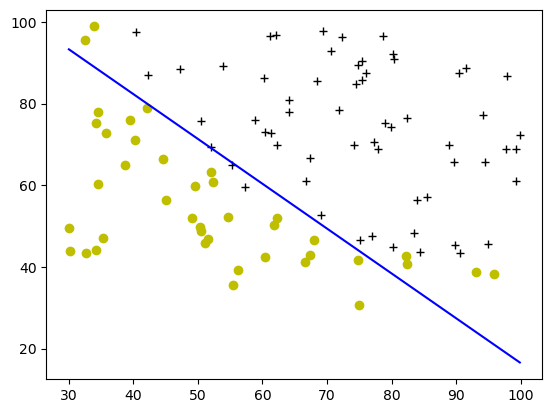

In [13]:
plot_decision_boundary(w, b, x, y)

Prediction Accuracy

## Regularised Logistic Regression

In [14]:
x, y = load_data("data/ex2data2.txt")

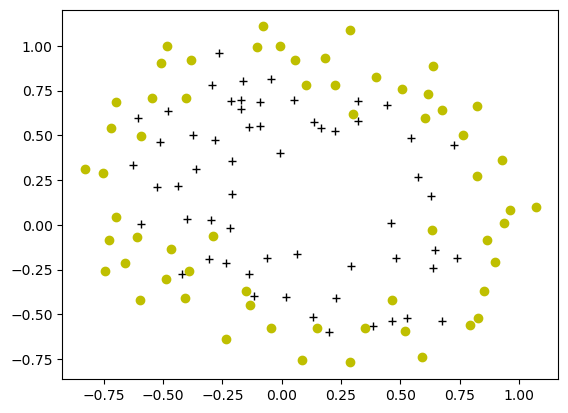

In [15]:
plot_data(x, y)

In [16]:
def map_features(x1, x2):
    x1 = np.atleast_1d(x1)
    x2 = np.atleast_1d(x2)
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i+1):
            out.append(x1**(i-j) * x2**j)
    return np.stack(out, axis=1)

In [17]:
x = map_features(x[:, 0], x[:, 1])
m, n = x.shape

In [18]:
def compute_cost_reg(x, y, w, b, lambda_):
    m = x.shape[0]
    return compute_cost(x, y, w, b) + (lambda_/(2 * m)) * np.sum(np.square(w))

In [19]:
def compute_gradient_reg(x, y , w, b, lambda_):
    m = x.shape[0]
    return compute_gradient(x, y, w, b)[0], compute_gradient(x, y, w, b)[1] + (lambda_/m) * w

In [20]:
np.random.seed(1)
w = w  = np.random.rand(x.shape[1]) - 0.5 
b = 1.
# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 0.01
# Some gradient descent settings
iter = 10000
alpha = 0.01
cost, w_, b_ = gradient_descent(x, y, w, b, compute_cost_reg, compute_gradient_reg, alpha, iter, lambda_)

Iterations: 1000 Cost: 0.59
Iterations: 2000 Cost: 0.56
Iterations: 3000 Cost: 0.53
Iterations: 4000 Cost: 0.51
Iterations: 5000 Cost: 0.5
Iterations: 6000 Cost: 0.48
Iterations: 7000 Cost: 0.47
Iterations: 8000 Cost: 0.46
Iterations: 9000 Cost: 0.45
Iterations: 9999 Cost: 0.45


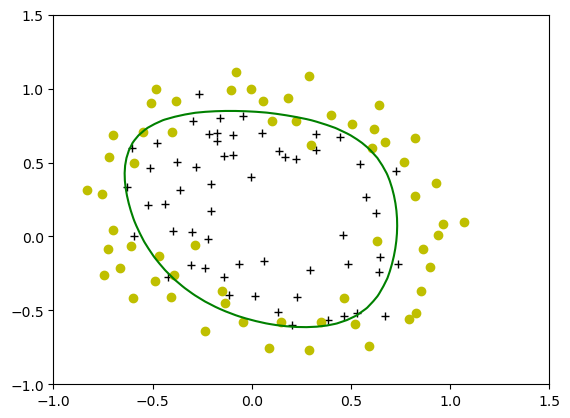

In [21]:
plot_decision_boundary(w_, b_, x, y)

In [22]:
compute_gradient_reg_test(compute_gradient_reg)
compute_cost_reg_test(compute_cost_reg)

All tests passed!
All tests passed!


In [23]:
print(accuracy(x, y, w_, b_))

Train Accuracy: 82.203390
